In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
bank = pd.read_csv("bank-full.csv",delimiter=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
X = bank.iloc[:, :-1]
Y = bank[['y']]

In [7]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [8]:
Y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [9]:
X['education'] = X['education'].replace( {'unknown': 0, 'primary': 1,'secondary': 2,'tertiary': 3})

In [10]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,0,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,0,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [11]:
Y['y'] = Y['y'].replace({'no': 0, 'yes': 1})

<ipython-input-11-97fcb0d06f1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['y'] = Y['y'].replace({'no': 0, 'yes': 1})


In [12]:
Y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [13]:
Xd = pd.get_dummies(X, columns=['job','marital','education','default','housing','loan', 'contact','month','poutcome'])

In [14]:
Xd.shape

(45211, 51)

In [15]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(Xd,test_size=0.3)
train_Y,test_Y=train_test_split(Y,test_size=0.3)

In [21]:
classifier = LogisticRegression()
classifier.fit(Xd,Y)

C:\Users\smile\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\smile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = classifier.predict(Xd)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
print (cm)

[[39137   785]
 [ 4104  1185]]


In [29]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
sensitivity=TP/(TP+FN)
spec=TN/(TN+FP)
precision=TP/(TP+FP)
print(sensitivity,spec,precision)

0.22404991491775383 0.9803366564801362 0.6015228426395939


In [30]:
import numpy as np
Accuracy= np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.8918625998097808


In [31]:
cm_test=confusion_matrix(test_Y,classifier.predict(test_x))
print(cm_test)

[[11473   514]
 [ 1510    67]]


In [32]:
(11473+67)/(11473+1510+514+67)

0.8507814803892657

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [35]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (Xd)[:,1])

df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})
df_new[df_new["fpr"]>=0.22]

,fpr,tpr,cutoff
5004,0.220355,0.781244,1.264300e-01
5005,0.220355,0.781433,1.264192e-01
5006,0.220555,0.781433,1.263368e-01
5007,0.220555,0.781622,1.263301e-01
5008,0.220630,0.781622,1.262971e-01
...,...,...,...
7162,0.994539,0.999622,1.913049e-05
7163,0.994539,0.999811,1.909693e-05
7164,0.998021,0.999811,8.701306e-07
7165,0.998021,1.000000,8.694003e-07


Text(0, 0.5, 'True Positive Rate')

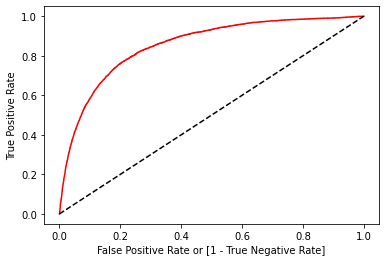

In [36]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [37]:
auc

0.602193285698945

In [41]:
prob=classifier.predict_proba(Xd)
prob=prob[:,1]
prob



array([0.03888605, 0.02343454, 0.01958993, ..., 0.68018133, 0.08662837,
       0.14688691])